# Plotting - Statistical Significance

The main library for plotting is **matplotlib**, which uses the Matlab plotting capabilities. 

We can also use the **seaborn** library on top of that to do visually nicer plots

In [1]:
import pandas as pd
import pandas_datareader.data as web # For accessing web data
from datetime import datetime #For handling dates
import os

import matplotlib.pyplot as plt #main plotting tool for python
import matplotlib as mpl

import seaborn as sns #A more fancy plotting library

#For presenting plots inline
%matplotlib inline 

In [2]:
os.environ["IEX_API_KEY"] = "pk_4f1eb9a770e04d2ebc44123e297618bb"#"pk_******************************"

In [3]:
stocks = 'FB'
data_source = 'iex'
start = datetime(2018,1,1)
end = datetime(2018,12,31)

stocks_data = web.DataReader(stocks, data_source, start, end)

#If you want to load only some of the attributes:
#stocks_data = web.DataReader(stocks, data_source, start, end)[['open','close']]

In [4]:
df = stocks_data
df = df.rename(columns = {'volume':'vol'})

In [5]:
df['profit'] = (df.close - df.open)
for idx, row in df.iterrows():
    if row.close < row.open:
        df.loc[idx,'gain']='negative'
    elif (row.close - row.open) < 1:
        df.loc[idx,'gain']='small_gain'
    elif (row.close - row.open) < 3:
        df.loc[idx,'gain']='medium_gain'
    else:
        df.loc[idx,'gain']='large_gain'
        
for idx, row in df.iterrows():
    if row.vol < df.vol.mean():
        df.loc[idx,'size']='small'
    else:
        df.loc[idx,'size']='large'
        
df.head()

open    high       low   close       vol  profit         gain  \
date                                                                          
2018-01-02  177.68  181.58  177.5500  181.42  18151903    3.74   large_gain   
2018-01-03  181.88  184.78  181.3300  184.67  16886563    2.79  medium_gain   
2018-01-04  184.90  186.21  184.0996  184.33  13880896   -0.57     negative   
2018-01-05  185.59  186.90  184.9300  186.85  13574535    1.26  medium_gain   
2018-01-08  187.20  188.90  186.3300  188.28  17994726    1.08  medium_gain   

             size  
date               
2018-01-02  small  
2018-01-03  small  
2018-01-04  small  
2018-01-05  small  
2018-01-08  small

In [6]:
gain_groups = df.groupby('gain')
gdf= df[['open','low','high','close','vol','gain']].groupby('gain').mean()
gdf = gdf.reset_index()

### Simple plots

The documentation for the plot function for data frames can be found here: 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

<AxesSubplot:xlabel='date'>

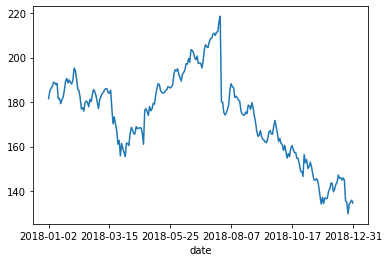

In [7]:
df.high.plot()

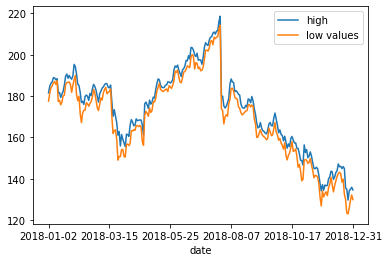

In [8]:
df.high.plot()
df.low.plot(label='low values')
plt.legend(loc='best') #puts the ledgent in the best possible position

### Histograms

<AxesSubplot:>

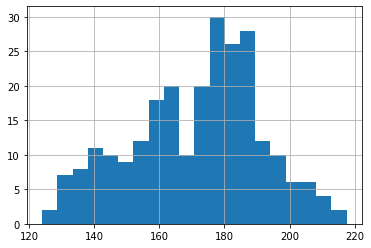

In [9]:
df.close.hist(bins=20)

<AxesSubplot:xlabel='close', ylabel='Count'>

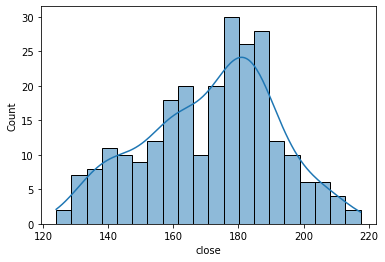

In [10]:
sns.histplot(df.close,bins=20,kde=True)
#distplot can also be used

### Plotting columns against each other

In [11]:
dff = pd.read_csv('example-functions.csv')
dfs = dff.sort_values(by='A', ascending = True) #Sorting in data frames

Plot columns B,C,D against A 

The plt.figure() command creates a new figure for each plot

<Figure size 432x288 with 0 Axes>

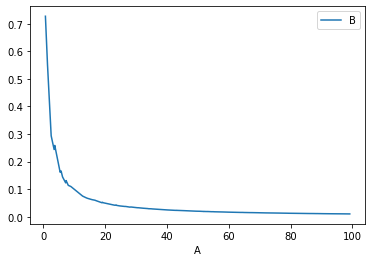

<Figure size 432x288 with 0 Axes>

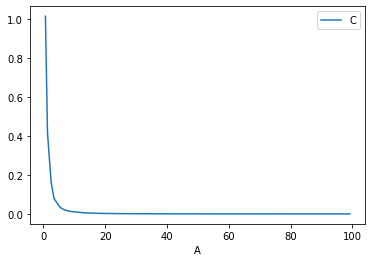

<Figure size 432x288 with 0 Axes>

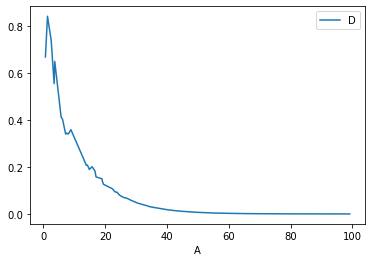

In [12]:
plt.figure(); 
dfs.plot(x = 'A', y = 'B');
plt.figure(); 
dfs.plot(x = 'A', y = 'C');
plt.figure(); 
dfs.plot(x = 'A', y = 'D');

### Grid of plots

Use a grid to put all the plots together

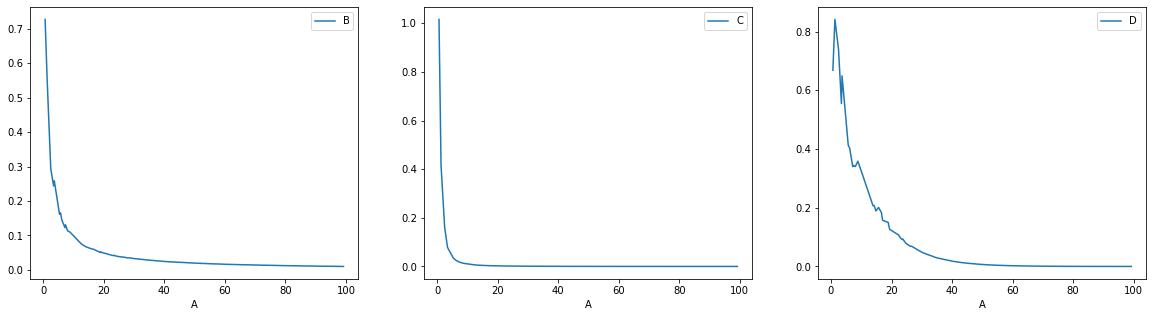

In [13]:
#plt.figure(); 
fig, ax = plt.subplots(1, 3,figsize=(20,5))
dfs.plot(x = 'A', y = 'B',ax = ax[0]);
dfs.plot(x = 'A', y = 'C',ax = ax[1]);
dfs.plot(x = 'A', y = 'D',ax = ax[2]);

Plot all colums together against A.

Clearly they are different functions

<Figure size 432x288 with 0 Axes>

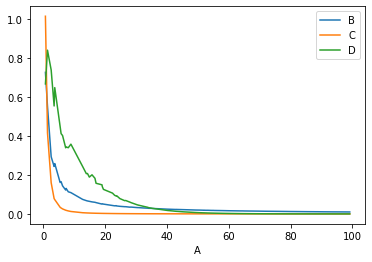

In [14]:
plt.figure(); dfs.plot(x = 'A', y = ['B','C','D']);

Plot all columns against A in log scale

We observe straight lines for B,C while steeper drop for D

<Figure size 432x288 with 0 Axes>

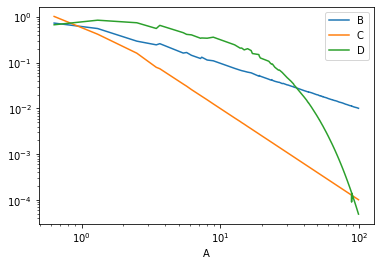

In [15]:
plt.figure(); dfs.plot(x = 'A', y = ['B','C','D'], loglog=True);

Plot with log scale only on y-axis. 

The plot of D becomes a line, indicating that D is an exponential function of A

<Figure size 432x288 with 0 Axes>

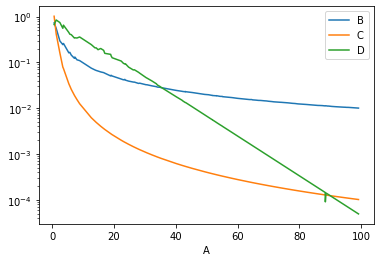

In [16]:
plt.figure(); dfs.plot(x = 'A', y = ['B','C','D'], logy=True);

### Plotting using matplotlib

Also how to put two figures in a 1x2 grid

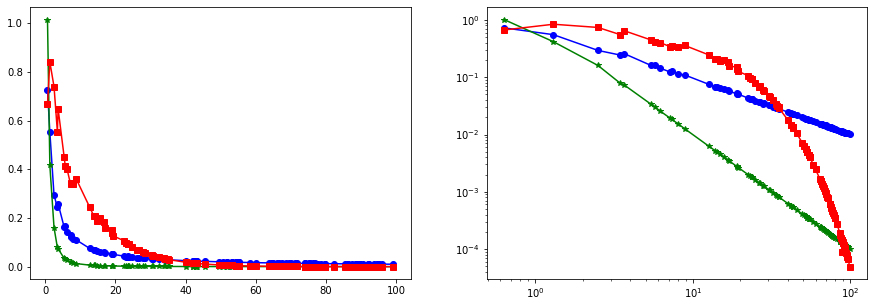

In [17]:
plt.figure(figsize = (15,5)) #defines the size of figure
plt.subplot(121) #plot with 1 row, 2 columns, 1st plot
plt.plot(dfs['A'],dfs['B'],'bo-',dfs['A'],dfs['C'],'g*-',dfs['A'],dfs['D'],'rs-')
plt.subplot(122)  #plot with 1 row, 2 columns, 2nd plot
plt.loglog(dfs['A'],dfs['B'],'bo-',dfs['A'],dfs['C'],'g*-',dfs['A'],dfs['D'],'rs-')

Using seaborn

<AxesSubplot:xlabel='A', ylabel='B'>

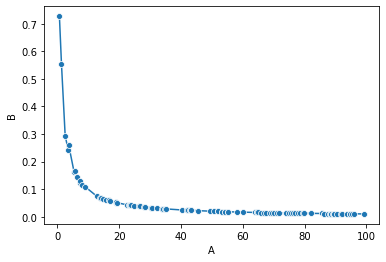

In [18]:
sns.lineplot(x= 'A', y='B',data = dfs,marker='o')

### Scatter plots ###

Scatter plots take as imput two series X and Y and plot the points (x,y).

We will do the same plots as before as scatter plots using the dataframe functions

<AxesSubplot:xlabel='A', ylabel='B'>

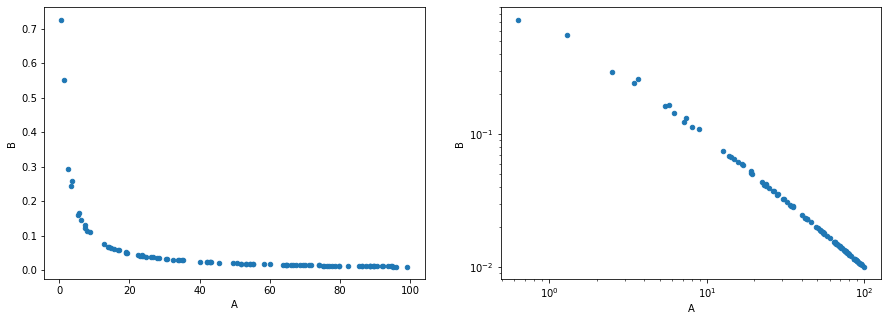

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
dff.plot(kind ='scatter', x='A', y='B', ax = ax[0])
dff.plot(kind ='scatter', x='A', y='B', loglog = True,ax = ax[1])

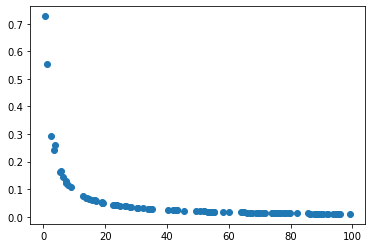

In [20]:
plt.scatter(dff.A, dff.B)

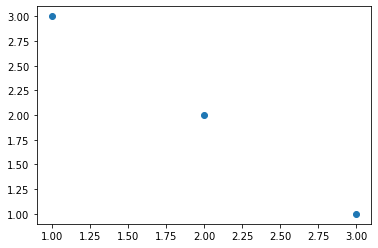

In [21]:
plt.scatter([1,2,3],[3,2,1])

Putting many scatter plots into the same plot

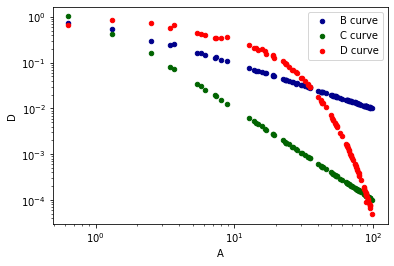

In [22]:
t = dff.plot(kind='scatter', x='A', y='B', color='DarkBlue', label='B curve', loglog=True);
dff.plot(kind='scatter', x='A', y='C',color='DarkGreen', label='C curve', ax=t, loglog = True);
dff.plot(kind='scatter', x='A', y='D',color='Red', label='D curve', ax=t, loglog = True);

**Using seaborn**

<AxesSubplot:xlabel='A', ylabel='B'>

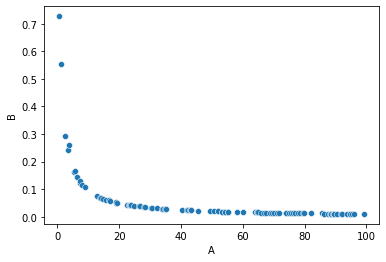

In [23]:
sns.scatterplot(x='A',y='B', data = dff)

In log-log scale (for some reason it seems to throw away small values)

[]

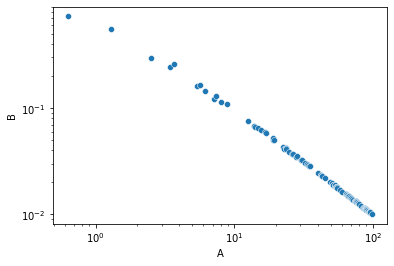

In [24]:
splot = sns.scatterplot(x='A',y='B', data = dff)
#splot.set(xscale="log", yscale="log")
splot.loglog()

### Statistical Significance ###

Recall the dataframe we obtained when grouping by gain

In [25]:
gdf

gain        open         low        high       close           vol
0   large_gain  170.459459  169.941454  175.660722  174.990811  3.034571e+07
1  medium_gain  172.305504  171.410923  175.321108  174.185577  2.795407e+07
2     negative  171.473133  168.024464  172.441342  169.233636  2.771124e+07
3   small_gain  171.217688  169.827283  173.070561  171.699146  2.488339e+07

We see that there are differences in the volume of trading depending on the gain. But are these differences statistically significant?  We can test that using the Student t-test. The Student t-test will give us a value for the differnece between the means in units of standard error, and a p-value that says how important this difference is. Usually we require the p-value to be less than 0.05 (or 0.01 if we want to be more strict). Note that for the test we will need to use all the values in the group.

To compute the t-test we will use the **SciPy** library, a Python library for scientific computing.

### The Student t-test

In [26]:
import scipy as sp #library for scientific computations 
from scipy import stats #The statistics part of the library

The t-test value is:

$$t = \frac{\bar{x}_1-\bar{x}_2}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}} $$

where $\bar x_i$ is the mean value of the $i$ dataset, $\sigma_i^2$ is the variance, and $n_i$ is the size. 

In [27]:
#Test statistical significance of the difference in the mean volume numbers

sm = gain_groups.get_group('small_gain').vol
lg = gain_groups.get_group('large_gain').vol
med = gain_groups.get_group('medium_gain').vol
neg = gain_groups.get_group('negative').vol
print(stats.ttest_ind(sm,neg,equal_var = False))
print(stats.ttest_ind(sm,med, equal_var = False))
print(stats.ttest_ind(sm,lg, equal_var = False))
print(stats.ttest_ind(neg,med,equal_var = False))
print(stats.ttest_ind(neg,lg,equal_var = False))
print(stats.ttest_ind(med,lg, equal_var = False))

Ttest_indResult(statistic=-0.7956394985081949, pvalue=0.429417750163685)
Ttest_indResult(statistic=-0.6701399815165451, pvalue=0.5044832095805987)
Ttest_indResult(statistic=-1.2311419812548245, pvalue=0.22206628199791936)
Ttest_indResult(statistic=-0.06722743349643102, pvalue=0.9465813743143181)
Ttest_indResult(statistic=-0.7690284467674665, pvalue=0.44515731685000515)
Ttest_indResult(statistic=-0.5334654665318221, pvalue=0.5950877691078409)


### Kolomogorov-Smirnov Test

Test if the data for small and large gain come from the same distribution.
The p-value > 0.1 inidcates that we cannot reject the null hypothesis that they do come from the same distribution.

Use scipy.stats.ks_2samp for testing two samples if they come form the same distribution.

If you want to test a single sample against a fixed distribution (e.g., normal) use the scipy.stats.kstest 

In [28]:
import numpy as np
stats.ks_2samp(np.array(sm), np.array(lg), alternative='two-sided')

KstestResult(statistic=0.26170072511535925, pvalue=0.10972343109925764)

In [29]:
stats.kstest(np.array(sm), 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

### $\chi^2$-test

We use the $\chi^2$-test to test if two random variables are independent. The larger the value of the test the farther from independence. The p-value tells us whether the value is statistically significant.

In [30]:
# The crosstab methond creates the contigency table for the two attributes.
cdf = pd.crosstab(df['gain'],df['size'])
cdf

size         large  small
gain                     
large_gain      15     22
medium_gain     11     41
negative        41     80
small_gain       6     35

In [31]:
stats.chi2_contingency(cdf)

(9.442582630336563,
 0.02395009556491976,
 3,
 array([[10.76095618, 26.23904382],
        [15.12350598, 36.87649402],
        [35.19123506, 85.80876494],
        [11.92430279, 29.07569721]]))

### Error bars

We can compute the standard error of the mean using the <tt>stats.sem </tt> method of scipy, which can also be called from the data frame

In [32]:
print(sm.sem())
print(neg.sem())
print(stats.sem(med))
print(stats.sem(lg))

3207950.267667195
1530132.8120272094
3271861.2395884297
3064988.17806777


Computing confidence intervals

In [33]:
conf = 0.95
t = stats.t.ppf((1+conf)/2., len(sm)-1)
print(sm.mean()-sm.sem()*t,   sm.mean()+sm.sem()*t)

18399882.586583555 31366901.218294494


We can also visualize the mean and the standard error in a bar-plot, using the barplot function of seaborn. Note that we need to apply this to the original data. The averaging is done automatically.

<AxesSubplot:xlabel='gain', ylabel='vol'>

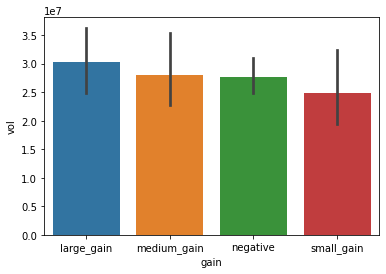

In [34]:
sns.barplot(x='gain',y='vol', data = df,ci=95)

<AxesSubplot:xlabel='gain', ylabel='vol'>

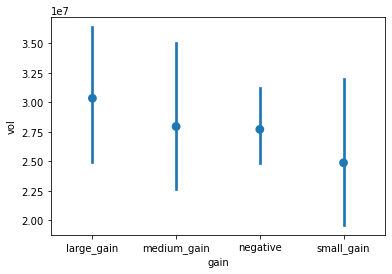

In [35]:
sns.pointplot(x='gain',y='vol', data = df,join = False, ci=95)

### Visualizing distributions

We can also visualize the distribution using a **box-plot**. In the box plot, the box shows the quartiles of the dataset (the part between the higher 25% and lower 25%), while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers”. The line shows the median.

<AxesSubplot:xlabel='gain', ylabel='vol'>

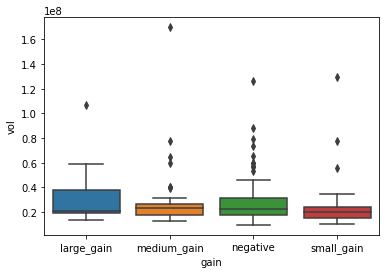

In [36]:
sns.boxplot(x='gain',y='vol', data = df)

<AxesSubplot:xlabel='gain', ylabel='vol'>

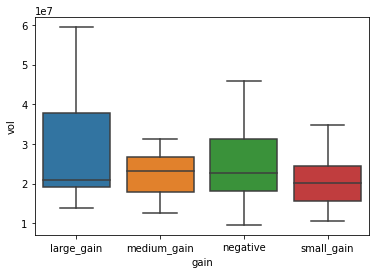

In [37]:
#Removing outliers
sns.boxplot(x='gain',y='vol', data = df, showfliers = False)

We can also use a [**violin plot**](https://seaborn.pydata.org/generated/seaborn.violinplot.html) to visualize the distributions

<AxesSubplot:xlabel='gain', ylabel='vol'>

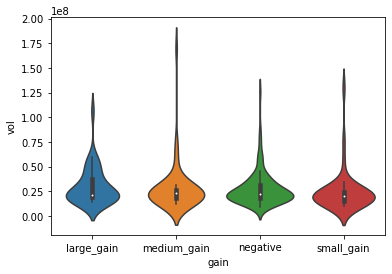

In [38]:
sns.violinplot(x='gain',y='vol', data = df)

<AxesSubplot:xlabel='all', ylabel='profit'>

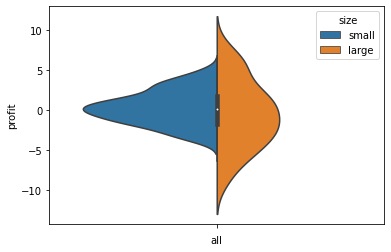

In [39]:
df['all'] = ''
sns.violinplot(x = 'all', y='profit',hue='size', split=True, data = df)

<AxesSubplot:xlabel='gain', ylabel='profit'>

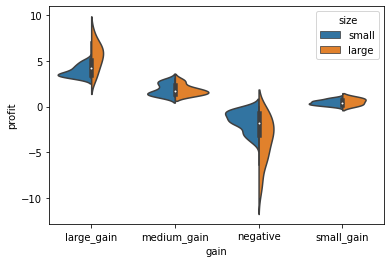

In [40]:
sns.violinplot(x='gain',y='profit', hue='size', data = df, split=True)

### Seaborn lineplot

Plot the average volume over the different months

In [41]:
df = df.reset_index()
df.date = df.date.apply(lambda d: datetime.strptime(d, "%Y-%m-%d"))

In [42]:
def get_month(row):
    return row.date.month

df['month'] = df.apply(get_month,axis = 1)

<AxesSubplot:xlabel='month', ylabel='vol'>

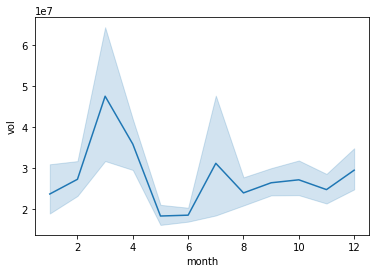

In [43]:
sns.lineplot(x='month', y = 'vol', data = df, ci=95)

<AxesSubplot:xlabel='month', ylabel='vol'>

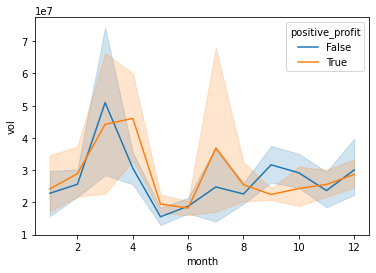

In [44]:
df['positive_profit'] = (df.profit>0)
sns.lineplot(x='month', y = 'vol', hue='positive_profit', data = df)

In [45]:
df.drop('date',axis=1)

open    high       low   close       vol  profit         gain   size  \
0    177.68  181.58  177.5500  181.42  18151903    3.74   large_gain  small   
1    181.88  184.78  181.3300  184.67  16886563    2.79  medium_gain  small   
2    184.90  186.21  184.0996  184.33  13880896   -0.57     negative  small   
3    185.59  186.90  184.9300  186.85  13574535    1.26  medium_gain  small   
4    187.20  188.90  186.3300  188.28  17994726    1.08  medium_gain  small   
..      ...     ...       ...     ...       ...     ...          ...    ...   
246  123.10  129.74  123.0200  124.06  22066002    0.96   small_gain  small   
247  126.00  134.24  125.8900  134.18  39723370    8.18   large_gain  large   
248  132.44  134.99  129.6700  134.52  31202509    2.08  medium_gain  large   
249  135.34  135.92  132.2000  133.20  22627569   -2.14     negative  small   
250  134.45  134.64  129.9500  131.09  24625308   -3.36     negative  small   

    all  month  positive_profit  
0            1             True  
1            1             True  
2            1            False  
3            1             True  
4            1             True  
..   ..    ...              ...  
246         12             True  
247         12             True  
248         12             True  
249         12            False  
250         12            False  

[251 rows x 11 columns]

## Comparing multiple stocks

As a last task, we will use the experience we obtained so far -- and learn some new things -- in order to compare the performance of different stocks we obtained from Yahoo finance.

In [46]:
stocks = ['FB','GOOG','TSLA', 'MSFT','NFLX']
attr = 'close'
dfmany = web.DataReader(stocks, 
                    data_source,                               
                    start=datetime(2018, 1, 1), 
                    end=datetime(2018, 12, 31))[attr]
dfmany.head()

Symbols         FB     GOOG    TSLA   MSFT    NFLX
date                                              
2018-01-02  181.42  1065.00  64.106  85.95  201.07
2018-01-03  184.67  1082.48  63.450  86.35  205.05
2018-01-04  184.33  1086.40  62.924  87.11  205.63
2018-01-05  186.85  1102.23  63.316  88.19  209.99
2018-01-08  188.28  1106.94  67.282  88.28  212.05

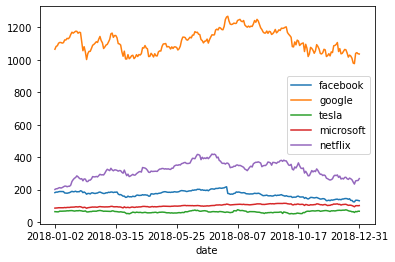

In [47]:
dfmany.FB.plot(label = 'facebook')
dfmany.GOOG.plot(label = 'google')
dfmany.TSLA.plot(label = 'tesla')
dfmany.MSFT.plot(label = 'microsoft')
dfmany.NFLX.plot(label = 'netflix')
_ = plt.legend(loc='best')

Next, we will calculate returns over a period of length $T$, defined as:

$$r(t) = \frac{f(t)-f(t-T)}{f(t)} $$

The returns can be computed with a simple DataFrame method **`pct_change()`**.  Note that for the first $T$ timesteps, this value is not defined (of course):

In [48]:
rets = dfmany.pct_change(30)
rets.iloc[25:35]

Symbols           FB      GOOG      TSLA      MSFT      NFLX
date                                                        
2018-02-07       NaN       NaN       NaN       NaN       NaN
2018-02-08       NaN       NaN       NaN       NaN       NaN
2018-02-09       NaN       NaN       NaN       NaN       NaN
2018-02-12       NaN       NaN       NaN       NaN       NaN
2018-02-13       NaN       NaN       NaN       NaN       NaN
2018-02-14 -0.010473  0.004413  0.005553  0.056545  0.322922
2018-02-15 -0.025505  0.006504  0.053002  0.073075  0.366837
2018-02-16 -0.037813  0.007732  0.066334  0.056136  0.354472
2018-02-20 -0.058014  0.000209  0.057458  0.051366  0.326492
2018-02-21 -0.055078  0.003975 -0.009245  0.036362  0.325348

Now we'll plot the timeseries of the returns of the different stocks.

Notice that the `NaN` values are gracefully dropped by the plotting function.

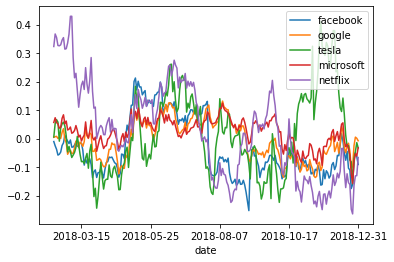

In [49]:
rets.FB.plot(label = 'facebook')
rets.GOOG.plot(label = 'google')
rets.TSLA.plot(label = 'tesla')
rets.MSFT.plot(label = 'microsoft')
rets.NFLX.plot(label = 'netflix')
_ = plt.legend(loc='best')

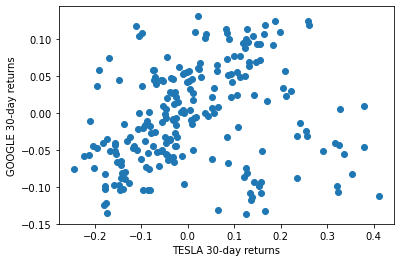

In [50]:
plt.scatter(rets.TSLA, rets.GOOG)
plt.xlabel('TESLA 30-day returns')
_ = plt.ylabel('GOOGLE 30-day returns')

We can also use the seaborn library for doing the scatterplot. Note that this method returns an object which we can use to set different parameters of the plot. In the example below we use it to set the x and y labels of the plot. Read online for more options.

In [51]:
data_source = 'iex'
start = datetime(2018,1,1)
end = datetime(2018,12,31)

dfb = web.DataReader('FB', data_source, start, end)
dgoog = web.DataReader('GOOG', data_source, start, end)

print(dfb.head())
print(dgoog.head())

              open    high       low   close    volume
date                                                  
2018-01-02  177.68  181.58  177.5500  181.42  18151903
2018-01-03  181.88  184.78  181.3300  184.67  16886563
2018-01-04  184.90  186.21  184.0996  184.33  13880896
2018-01-05  185.59  186.90  184.9300  186.85  13574535
2018-01-08  187.20  188.90  186.3300  188.28  17994726
               open       high        low    close   volume
date                                                       
2018-01-02  1048.34  1066.9400  1045.2300  1065.00  1237564
2018-01-03  1064.31  1086.2900  1063.2100  1082.48  1430170
2018-01-04  1088.00  1093.5699  1084.0017  1086.40  1004605
2018-01-05  1094.00  1104.2500  1092.0000  1102.23  1279123
2018-01-08  1102.23  1111.2700  1101.6200  1106.94  1047603


In [52]:
def gainrow(row):
    if row.close < row.open:
        return 'negative'
    elif (row.close - row.open) < 1:
        return 'small_gain'
    elif (row.close - row.open) < 3:
        return 'medium_gain'
    else:
        return 'large_gain'
    
dfb['gain'] = dfb.apply(gainrow, axis = 1)
dgoog['gain'] = dgoog.apply(gainrow, axis = 1)
dfb['profit'] = dfb.close-dfb.open
dgoog['profit'] = dgoog.close-dgoog.open

Text(0, 0.5, 'GOOG profit')

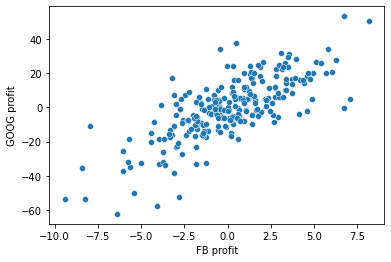

In [54]:
#Also using seaborn
fig = sns.scatterplot(x = dfb.profit, y = dgoog.profit)
fig.set_xlabel('FB profit')
fig.set_ylabel('GOOG profit')

Get all pairwise correlations in a single plot

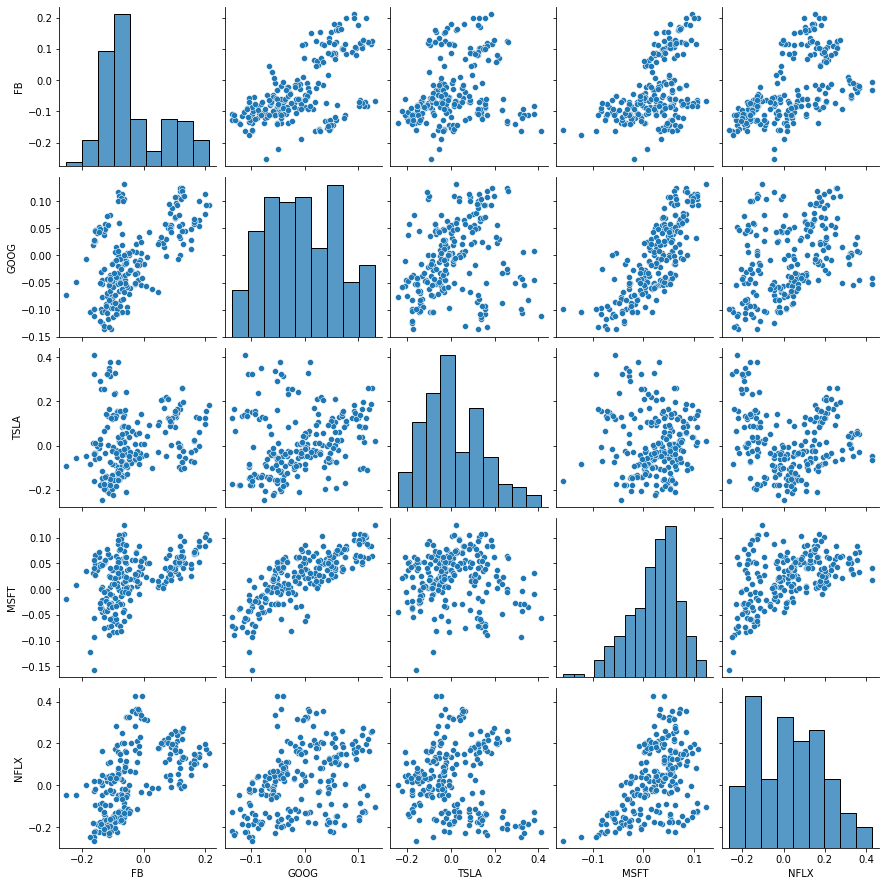

In [55]:
sns.pairplot(rets.iloc[30:])

There appears to be some (fairly strong) correlation between the movement of TSLA and YELP stocks.  Let's measure this.

### Correlation Coefficients

The correlation coefficient between variables $X$ and $Y$ is defined as follows:

$$\text{Corr}(X,Y) = \frac{E\left[(X-\mu_X)(Y-\mu_Y)\right]}{\sigma_X\sigma_Y}$$

Pandas provides a DataFrame method to compute the correlation coefficient of all pairs of columns: **`corr()`**.

In [56]:
rets.corr()

Symbols        FB      GOOG      TSLA      MSFT      NFLX
Symbols                                                  
FB       1.000000  0.598774  0.226679  0.470696  0.546996
GOOG     0.598774  1.000000  0.210443  0.790085  0.348008
TSLA     0.226679  0.210443  1.000000 -0.041911 -0.120763
MSFT     0.470696  0.790085 -0.041911  1.000000  0.489569
NFLX     0.546996  0.348008 -0.120763  0.489569  1.000000

In [57]:
rets.corr(method='spearman')

Symbols        FB      GOOG      TSLA      MSFT      NFLX
Symbols                                                  
FB       1.000000  0.540949  0.271608  0.457852  0.641344
GOOG     0.540949  1.000000  0.288135  0.803731  0.382466
TSLA     0.271608  0.288135  1.000000  0.042190 -0.065939
MSFT     0.457852  0.803731  0.042190  1.000000  0.456912
NFLX     0.641344  0.382466 -0.065939  0.456912  1.000000

It takes a bit of time to examine that table and draw conclusions.  

To speed that process up it helps to visualize the table using a heatmap.

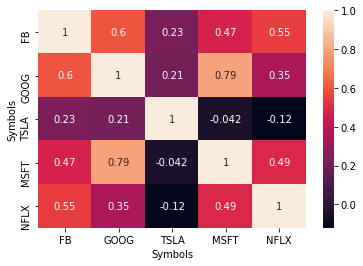

In [58]:
_ = sns.heatmap(rets.corr(), annot=True)

### Computing p-values

Use the scipy.stats library to obtain the p-values for the pearson and spearman rank correlations

In [59]:
print(stats.pearsonr(rets.iloc[30:].NFLX, rets.iloc[30:].TSLA))
print(stats.spearmanr(rets.iloc[30:].NFLX, rets.iloc[30:].TSLA))
print(stats.pearsonr(rets.iloc[30:].GOOG, rets.iloc[30:].FB))
print(stats.spearmanr(rets.iloc[30:].GOOG, rets.iloc[30:].FB))

(-0.12076292495970976, 0.07318874627276642)
SpearmanrResult(correlation=-0.065938830644713, pvalue=0.32918605296193537)
(0.5987743268934734, 6.85914166684247e-23)
SpearmanrResult(correlation=0.5409485585956174, pvalue=3.388893335195231e-18)


In [60]:
print(stats.pearsonr(dfb.profit, dgoog.profit))
print(stats.spearmanr(dfb.profit, dgoog.profit))

(0.750317985789302, 1.1738178432513165e-46)
SpearmanrResult(correlation=0.7189891515407237, pvalue=3.1813356072969645e-41)


### Matplotlib

Finally, it is important to know that the plotting performed by Pandas is just a layer on top of `matplotlib` (i.e., the `plt` package).  

So Panda's plots can (and should) be replaced or improved by using additional functions from `matplotlib`.

For example, suppose we want to know both the returns as well as the standard deviation of the returns of a stock (i.e., its risk).  

Here is visualization of the result of such an analysis, and we construct the plot using only functions from `matplotlib`.

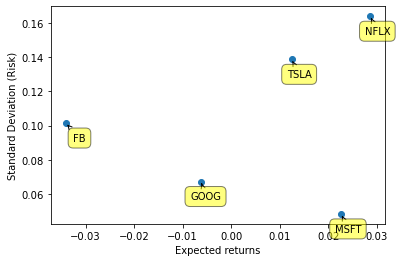

In [61]:
_ = plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Standard Deviation (Risk)')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

To understand what these functions are doing, (especially the `annotate` function), you will need to consult the online documentation for matplotlib.  Just use Google to find it.